In [6]:
ZERO = 0.1

#CORRECTION - put docstring inside of function
def decayNumerical (numInit, decayConst, timeStep):
    """
    Description: Calculates the numerical approximation of an exponential decay process based upon the given parameters

    Parameters: numInit - initial amount of the substance
                decayConst - decay constant specific to the substance
                timeStep - amount of time passing between samples

    returned: amount left at each timeStep intervals and the time values at each timeStep interval
    """
#END CORRECTION

    amountLeft = []
    timeValues = []
    numLeft = numInit
    time = 0

    #calculates the number remaining until the amount has leveled below the tolerance amount
    while (numLeft > ZERO):
        #adds values to the amount left and the time values
        amountLeft.append (numLeft)
        timeValues.append (time)
        
        #decrements the amount left based upon the decay rate and Euler method 
        numLeft -= numLeft * decayConst * timeStep
        time += timeStep
    
    return amountLeft, timeValues

        

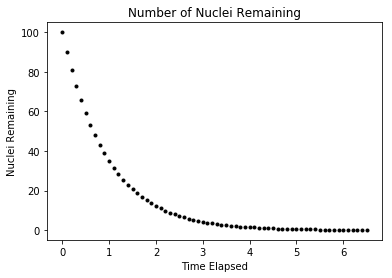

In [159]:
import pylab as plt
import numpy as np

%matplotlib inline

#situational values we are testing
numNuclei = 100
decayConst = 1
timeStep = 0.1

#graph labels
pltTitle = "Number of Nuclei Remaining"
pltXLabel = "Time Elapsed"
pltYLabel = "Nuclei Remaining"

#calculate the lists of values based upon variables we are testing
numNumerical, timeValues = decayNumerical (numNuclei, decayConst, timeStep)

#graphs the data
plt.plot ( timeValues, numNumerical,"k.")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.show ()

The graph above is a numerical solution to the differentiable equation $\frac{dN}{dt} = -\lambda N(t)$ using the Euler approximation. As a result of the solution being an approximation based upon small changes in time, increasing the time step decreases its accuracy. The exact solution to this differentiable equation is an exponential decay function. This situation models a situation that is random in specific decays but has an overall probability that an amount of the substance will decay in a given amount of time.

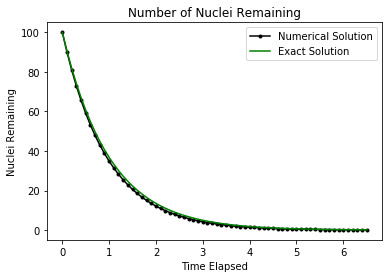

In [59]:
numExact = []

#calculates the remaining amount based upon the exact solution to an exponential decay process
for t in timeValues:
    numExact.append (numNuclei * np.exp (-decayConst * t))

#plots the exact solution along side the approximation
plt.plot ( timeValues, numNumerical,"k.-", label="Numerical Solution")
plt.plot ( timeValues, numExact,"g-", label="Exact Solution")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.legend()
plt.show ()

The numerical and exact data sets are very similar. The numerical solution has resulted in data values that are often just below the exact solution, but are still very close. This case is a fairly nice example of how we can make an approximation for a situation that would normally take an infinite number of calculations to solve under normal circumstances. This helps to show how the exponential decay function is a good solution to the differential equation $\frac{dN}{dt} = -\lambda N(t)$.

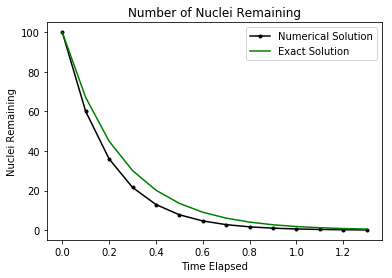

In [60]:
#sets the base values we will be testing
numNuclei2 = 100
decayConst2 = 4
timeStep2 = .1
numExact2 = []

#calculates the amount remaining and time values based upon the test variables defined above and the Euler approximation
numNumerical2, timeValues2 = decayNumerical (numNuclei2, decayConst2, timeStep2)

#calculates the exact amount remaining based upon an exponential decay
for t in timeValues2:
    numExact2.append (numNuclei2 * np.exp (-decayConst2 * t))

#plots the approximation alongside the exact solution
plt.plot ( timeValues2, numNumerical2,"k.-", label="Numerical Solution")
plt.plot ( timeValues2, numExact2,"g-", label="Exact Solution")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.legend()
plt.show ()

Playing with the decay constant, initial amount, and the time step I have noticed that increasing the time step and the decay constant decreases how similar the numerical solution is to the exact solution. Doing the opposite seemed to increase how similar the two solutions were. I did not see much of a difference between the two solutions when I changed the initial amounts. This would come about as a result of the numerical solution following from a limit, and thus looking at an infitesimal decrease in the time step.


In [111]:
#CORRECTION - put docstring inside of function
def decayABNumerical (numInitialA, numInitialB, decayConstA, decayConstB, timeStep):
    """
    Description: Returns the numerical approximation of two decaying substances A and B where B is dependant upon A

    Parameters: numInitialA - initial amount of substance A
                numInitialB - initial amount of substance B
                decayConstA - decay constant of substance A
                decayConstB - decay constant of substance B
                timeStep - amount of time between each substance amount calculation

    returned: lists having the number of A and number of B remaining at each time step until substance A falls below the the threshold
                limit value, and the list that has the times when each sample amount is recorded
    """
#END CORRECTION

    amountBLeft = []
    amountALeft = []
    timeValues = []
    numALeft = numInitialA
    numBLeft = numInitialB
    time = 0
    
    #continues calculating amount of each substance until the amount of A falls below the threshold value
    while (numALeft > ZERO or numBLeft > ZERO):
        #add the values to the lists for the specific time
        amountBLeft.append (numBLeft)
        amountALeft.append (numALeft)
        timeValues.append (time)
        
        #calculate the amount of substance A remaining based upon the current amount of A and the time since last calculation
        numALeft += timeStep * -decayConstA * numALeft
        
        #calculate the amount of substance B remaining based upon the current amount of B, the time since the last calculation,
        #and the amount of substance A that was converted to substance B
        numBLeft += timeStep * (decayConstA * numALeft - decayConstB * numBLeft)
        
        #increment the amount of time that has elapsed
        time += timeStep
        
    return amountALeft, amountBLeft, timeValues
    

In [112]:
#CORRECTION - put docstring inside of function
def printABChange (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB):
    """
    Description: prints a plot of the numerical solution to two decaying substance A and B where B is dependant on A

    Parameters: numInitialA - initial amount of substance A
                numInitialB - initial amount of substance B
                decayConstA - decay constant of substance A
                decayConstB - decay constant of substance B
                timeStep - amount of time between each substance amount calculation

    returned: none
    """
#END CORRECTION

    #calculates the amount of A and B remaining at each time interval
    numA, numB, timeValuesAB = decayABNumerical (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)

    #plots the data
    plt.plot ( timeValuesAB, numA,"ks", label="A Decay")
    plt.plot ( timeValuesAB, numB,"g.", label="B Decay")
    plt.xlabel (pltXLabel)
    plt.ylabel (pltYLabel)
    plt.title (pltTitle)

    plt.legend()
    plt.show ()

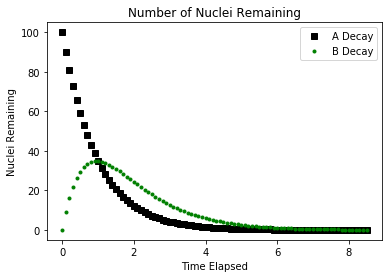

In [113]:
#values to test plotting
numInitialA = 100
numInitialB = 0
decayConstA = 1
decayConstB = 1
timeStepAB = 0.1

#plot test value
printABChange (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)

This is one of the coolest graphs I think we have had in physics. The A decay works the same as a normal exponential decay, while the B decay is dependant upon the A decay. Since A decays at an exponential rate B can actually have a positive rate of change during the first part of the graph (during the time before around 1), while it has a negative rate of change after less A nuclei are being converted to B then the B nuclei are being changed.

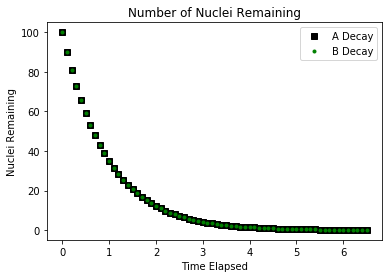

In [114]:
#test values to plot
numInitialA = 100
numInitialB = 100
decayConstA = 1
decayConstB = 1.9
timeStepAB = 0.1

#plot test values
printABChange (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)

#CORRECTION - spelling mistake  
This is a fairly interesting ratio of $\frac{\lambda_A}{\lambda_B}$. As a result the two samples have around the same number of nuclei at each time. I originally tried a ratio of 2:1 for B:A but found this ratio resulted in more similar values from the two samples.  
#END CORRECTION

#CORRECTION - added clarification as to why you cannot see two different data sets  
The reason you cannot see two different data sets is because the data values overlap. This was intentional, not a mistake. I chose the starting values for A and B to be the same, and for there to be a decay ratio of 1:1.9 for A to B. As a result of this choice the two samples have nearly the exact same number of nuclei remaining at each time.  
#END CORRECTION

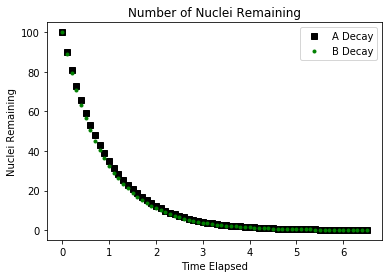

In [137]:
#CORRECTION - added another plot to show what decay ratio of A:B = 1:2 looks like
#test values to plot
numInitialA = 100
numInitialB = 100
decayConstA = 1
decayConstB = 2
timeStepAB = 0.1

#plot test values
printABChange (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)
#END CORRECTION

I figured since I showed the plot for a decay ratio of 1:1.9 in the previous plot it might be worth showing the initial ratio of 1:2 that I had tried. In this case sample A has slightly more nuclei remaining after each time period.

In [141]:
#CORRECTION - added a ton of extra plots to show more variety to the values I used (Correction ends far below just so you know)
def addABChangeSubplot (numSubPlotRows, numSubPlotColumns, subPlotNumber, numInitialA, numInitialB, 
                        decayConstA, decayConstB, timeStepAB, title = pltTitle, aLabel = "A Decay", 
                        bLabel = "B Decay"):
    """
    Description: adds a subplot of the numerical solution to two decaying substance A and B where B is dependant on A for display

    Parameters: numSubPlotRows - number of rows to the subplot
                numSubPlotColumns - number of columns to the subplot
                subPlotNumber - number of subplot that is being set
                numInitialA - initial amount of substance A
                numInitialB - initial amount of substance B
                decayConstA - decay constant of substance A
                decayConstB - decay constant of substance B
                timeStep - amount of time between each substance amount calculation
                title - title of subplot
                aLabel - legend label for set A
                bLabel - legend label for set B

    returned: none
    """
    
    plotLabelXPos = 0.06
    plotLabelYPos = 0.2
    plotLabelFontSize = 32

    #calculates the amount of A and B remaining at each time interval
    numA, numB, timeValuesAB = decayABNumerical (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)

    #plots the data
    ax = plt.subplot (numSubPlotRows, numSubPlotColumns, subPlotNumber)
    #puts a plot number in the bottom left corner of the plot for reference
    ax.text (plotLabelXPos, plotLabelYPos, "(" + str (subPlotNumber) + ")" , transform=ax.transAxes, fontsize=plotLabelFontSize)
    ax.plot ( timeValuesAB, numA,"ys", label = aLabel)
    ax.plot ( timeValuesAB, numB, "g.", label = bLabel)
    ax.set_ylabel (pltYLabel)
    ax.set_xlabel (pltXLabel)
    plt.title (title)
    ax.legend()

The line "ax.text (plotLabelXPos, plotLabelYPos, "(" + str (subPlotNumber) + ")" , transform=ax.transAxes, fontsize=plotLabelFontSize)" is a modified line taken from Dr. McDermott's solution to Lab3.


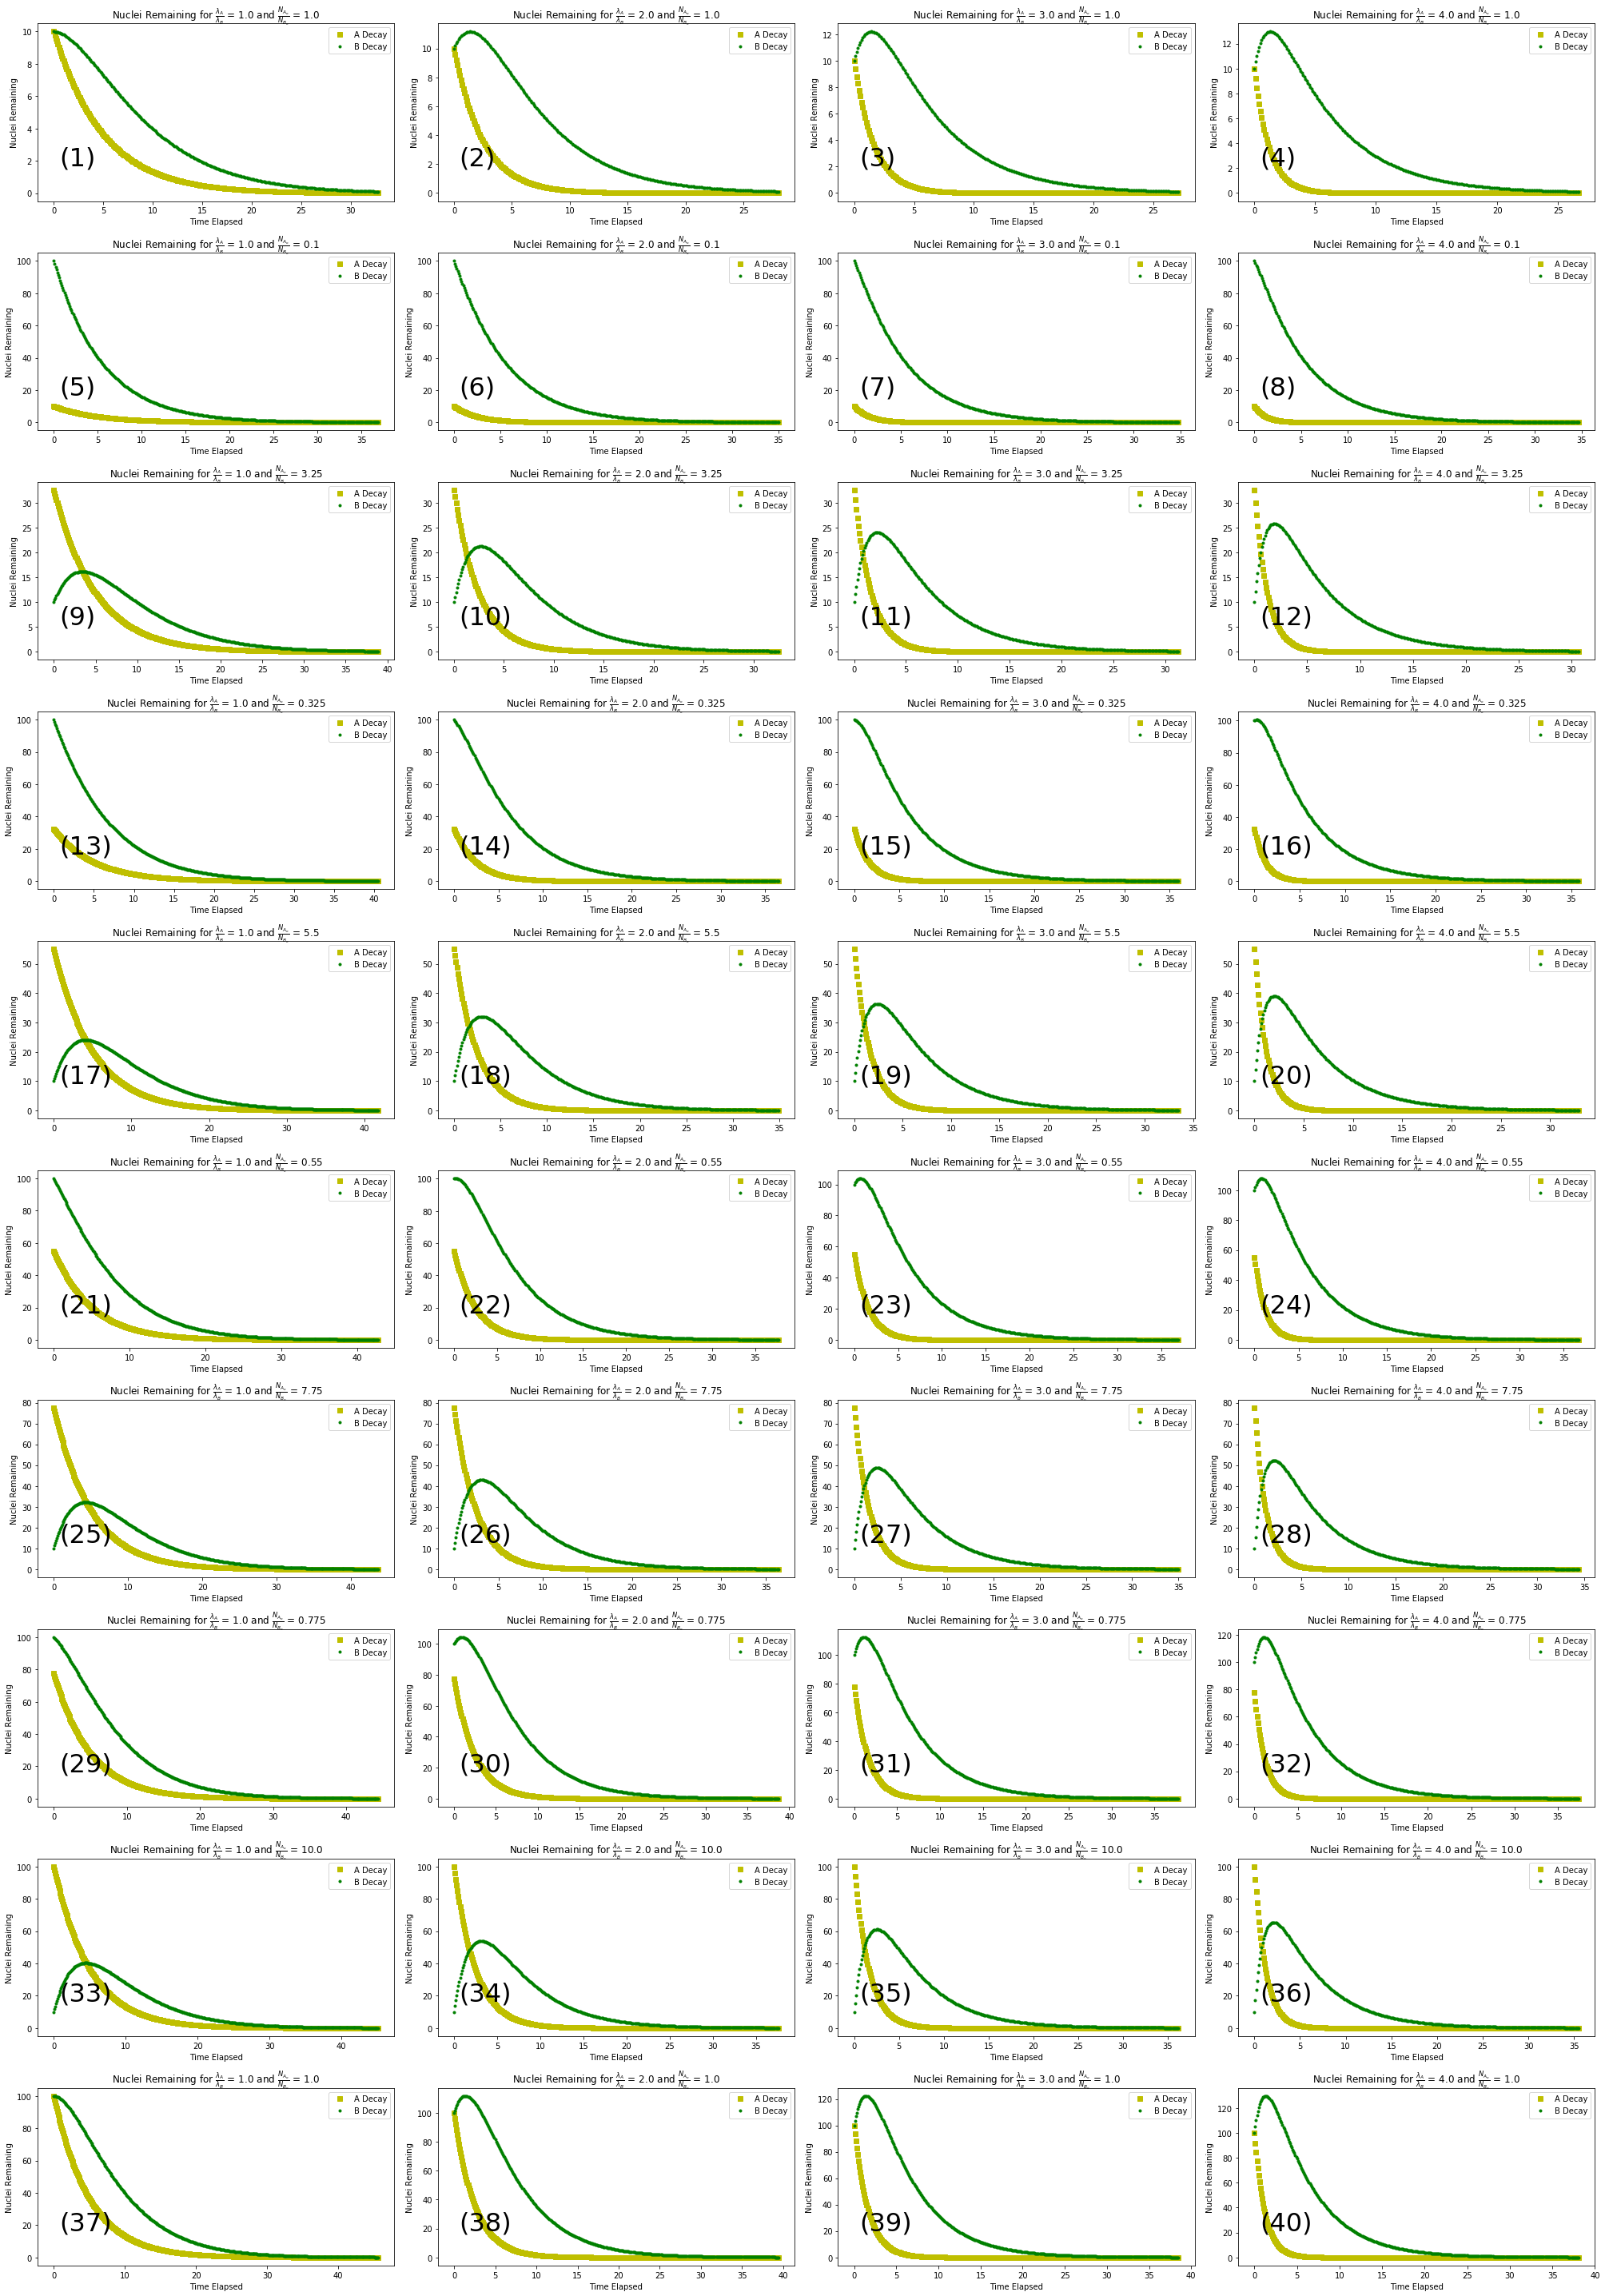

In [142]:
#values to test plotting
timeStepAB = 0.1
numInitialA = np.linspace (10, 100, 5)
numInitialB = np.linspace (10, 100, 2)
decayConstA = np.arange (0.2, 1, .2)
decayConstB = np.arange (0.2, 1, 1)

#number of subplots based upon intial values and decay values being tested
numSubPlotColumns = len (decayConstA) * len (decayConstB) 
numSubPlotRows = len (numInitialA) * len (numInitialB)

#sets figure size
figWidthMultiplier = 7 #7
figHeightMultiplier = 4 #4
plt.figure(figsize=(figWidthMultiplier * numSubPlotColumns, figHeightMultiplier * numSubPlotRows))


#current count of number of subplots
numSubPlots = 1

#add every possible subplot
for numA in numInitialA:
    for numB in numInitialB:
        #ratio of initial amount of A to initial amount of B
        initialRatio = numA / numB
        
        for decayA in decayConstA:
            for decayB in decayConstB:
                #ratio of decay constant of A to decay constant of B
                decayRatio = decayA / decayB
                
                #set the title based upon the current case being checked
                title = r"Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = " + str (decayRatio) \
                        + r" and $\frac{N_{A_o}}{N_{B_o}}$ = " + str (initialRatio)
               
                #add the subplot to be displayed
                addABChangeSubplot (numSubPlotRows, numSubPlotColumns, numSubPlots, numA, numB, 
                        decayA, decayB, timeStepAB, title, aLabel = "A Decay", 
                        bLabel = "B Decay")
                
                #increment the number of subplots that have already been added
                numSubPlots += 1
                
#plot the plots
plt.tight_layout ()

I was unsure as to what ratios I should try for the initial and decay values so I decided to try many of them. This figure is ordered from left to right with and increasing ratio of $\frac{\lambda_A}{\lambda_B}$ and top to bottom with a varying ratios of $\frac{N_{A_o}}{N_{B_o}}$. I know that the labeling is difficult to read, but this figure is not about the individual plots, but instead about comparing the plots. These plots allow for a general sense of how altering the values of the decay constants and the initial values change how the graphs look. The point of this part is to show an overall variation and is not meant to focus on a specific case, as such, the labeling ended up smaller to make room so more plots could be looked at. The information regarding the values in each subplot can be found displayed below.

From these plots we can see how A is simply the solution that is always decreasing in value and concave upwards (and is shown in yellow). The amount of the sample B left is the interesting part of the graph, and is shown in green. For the most part B tends to have a maximum near the beginning of the graph before decaying. Some cases where there is not a maximum is when B has an initial amount greater than or equal to A with a decay constant similar or greater than A (see subplot 21 where $\frac{\lambda_A}{\lambda_B}$ = 1 and $\frac{N_{A_o}}{N_{B_o}}$ = 0.55). 


In [181]:
numSubPlots = 1

#display all of the values for the different subplots
for numA in numInitialA:
    for numB in numInitialB:
        #ratio of initial amount of A to initial amount of B
        initialRatio = numA / numB
        print ()
        
        for decayA in decayConstA:
            for decayB in decayConstB:
                #ratio of decay constant of A to decay constant of B
                decayRatio = decayA / decayB
                
                #set the title based upon the current case being checked
                
                title = "Nuclei Remaining for $\\frac{\\lambda_A}{\\lambda_B}$ = " + str (decayRatio) \
                        + " and $\\frac{N_{A_o}}{N_{B_o}}$ = " + str (initialRatio)
                    
                subPlotLabel = "SubPlot: "
                
                if numSubPlots < 10:
                    subPlotLabel += " "
                
                #print the subplot's information
                print (subPlotLabel, numSubPlots, title)
                
                #increment the number of subplots that have already been added
                numSubPlots += 1


SubPlot:   1 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 1.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 1.0
SubPlot:   2 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 2.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 1.0
SubPlot:   3 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 3.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 1.0
SubPlot:   4 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 4.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 1.0

SubPlot:   5 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 1.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 0.1
SubPlot:   6 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 2.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 0.1
SubPlot:   7 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 3.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 0.1
SubPlot:   8 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 4.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 0.1

SubPlot:   9 Nuclei Remaining for $\frac{\lambda_A}{\lambda_B}$ = 1.0 and $\frac{N_{A_o}}{N_{B_o}}$ = 3.25
SubPlot:  10 Nuclei Remaining for $\frac{\

#END CORRECTION

#### Exact Solution

$N_B(t) = \big ( \frac{\lambda_A N_{A_o}}{\lambda_B - \lambda_A} \big ) e^{-\lambda_A t} + \big ( N_{B_o} - \frac{\lambda_A N_{A_o}}{\lambda_B - \lambda_A} \big ) e^{-\lambda_B t}$